In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from models.fcnn import FCNNv1
from models.base import PytorchEstimator
from models.custom_pipeline import CustomPipeline
from models.utils import plot_train_validation_loss_per_epoch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
X, y = load_digits(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [4]:
model_example = PytorchEstimator(model_class=FCNNv1,
                              model_arch={'HIDDEN_DIMS':[128, 64],
                                          "DROPOUT_PROB": 0.5},
                              task="classification",
                              epochs=100)

pipeline = CustomPipeline([
   #( "pca",PCA(15)),
   ("model", model_example)
])

pipeline.fit(X_train, y_train, validation_data=(X_val, y_val))


CustomPipeline(steps=[('model',
                       PytorchEstimator(epochs=100,
                                        model_arch={'DROPOUT_PROB': 0.5,
                                                    'HIDDEN_DIMS': [128, 64]},
                                        model_class=<class 'models.fcnn.FCNNv1'>))])

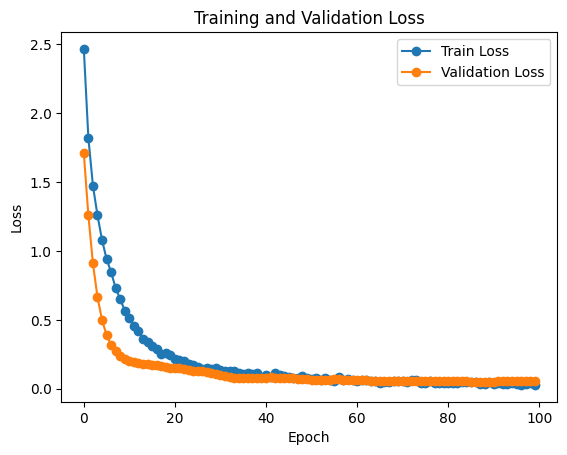

In [5]:
fig, ax = plt.subplots()
plot_train_validation_loss_per_epoch(model_example.train_loss,
                                     model_example.validation_loss,
                                     ax)
plt.show()

In [6]:
print(f"Actual labels: {y_val[:10]} \nPredicted labels: {pipeline.predict(X_val)[:10]}")

Actual labels: [9 3 1 3 5 5 4 9 3 7] 
Predicted labels: [9 3 1 3 5 5 4 9 3 7]


In [7]:
from models.utils import Metrics

metrics_validation = Metrics("classification", y_val, pipeline.predict(X_val))
metrics_train = Metrics("classification", y_train, pipeline.predict(X_train))

metrics_validation.results, metrics_train.results


({'accuracy': 0.9861111111111112,
  'recall': 0.9861111111111112,
  'precision': 0.9869302338052339},
 {'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0})

## Just checking if CNN works as intended

In [23]:
X, y = load_digits(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X.reshape(-1, 1, 8, 8), y, test_size=0.1)

In [24]:
from models.cnn import SimpleCNN
model_example = PytorchEstimator(model_class=SimpleCNN,
                              task="classification",
                              epochs=500)

model_example.fit(X_train, y_train, (X_val, y_val))

PytorchEstimator(epochs=500, model_arch={},
                 model_class=<class 'models.cnn.SimpleCNN'>)

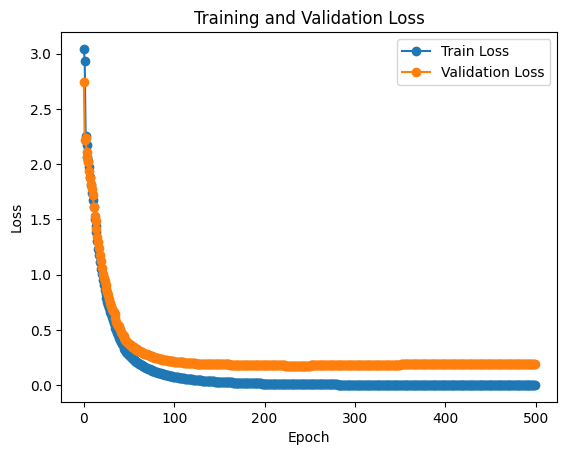

In [25]:
fig, ax = plt.subplots()
plot_train_validation_loss_per_epoch(model_example.train_loss,
                                     model_example.validation_loss,
                                     ax)
plt.show()

In [26]:
print(f"Actual labels: {y_val[:10]} \nPredicted labels: {model_example.predict(X_val)[:10]}")


Actual labels: [0 2 3 7 9 7 4 9 5 3] 
Predicted labels: [0 2 3 7 9 7 4 9 5 3]


In [27]:
from models.utils import Metrics

metrics_validation = Metrics("classification", y_val, model_example.predict(X_val))
metrics_train = Metrics("classification", y_train, model_example.predict(X_train))

metrics_validation.results, metrics_train.results


({'accuracy': 0.9555555555555556,
  'recall': 0.9555555555555556,
  'precision': 0.9571984778506518},
 {'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0})